# Diagrams

git: <https://github.com/mingrammer/diagrams/>

doc: <https://diagrams.mingrammer.com/docs/getting-started/examples>

/opt/test/diagrams/resources/onprem/analytics/hadoop.png

/opt/test/diagrams/website/static/img/resources/onprem/analytics/hadoop.png



In [29]:
%matplotlib inline

from diagrams import Cluster, Diagram, Edge
from IPython.display import Image, display

file=''

def sh(): display(Image(filename=f'{file}.png'))

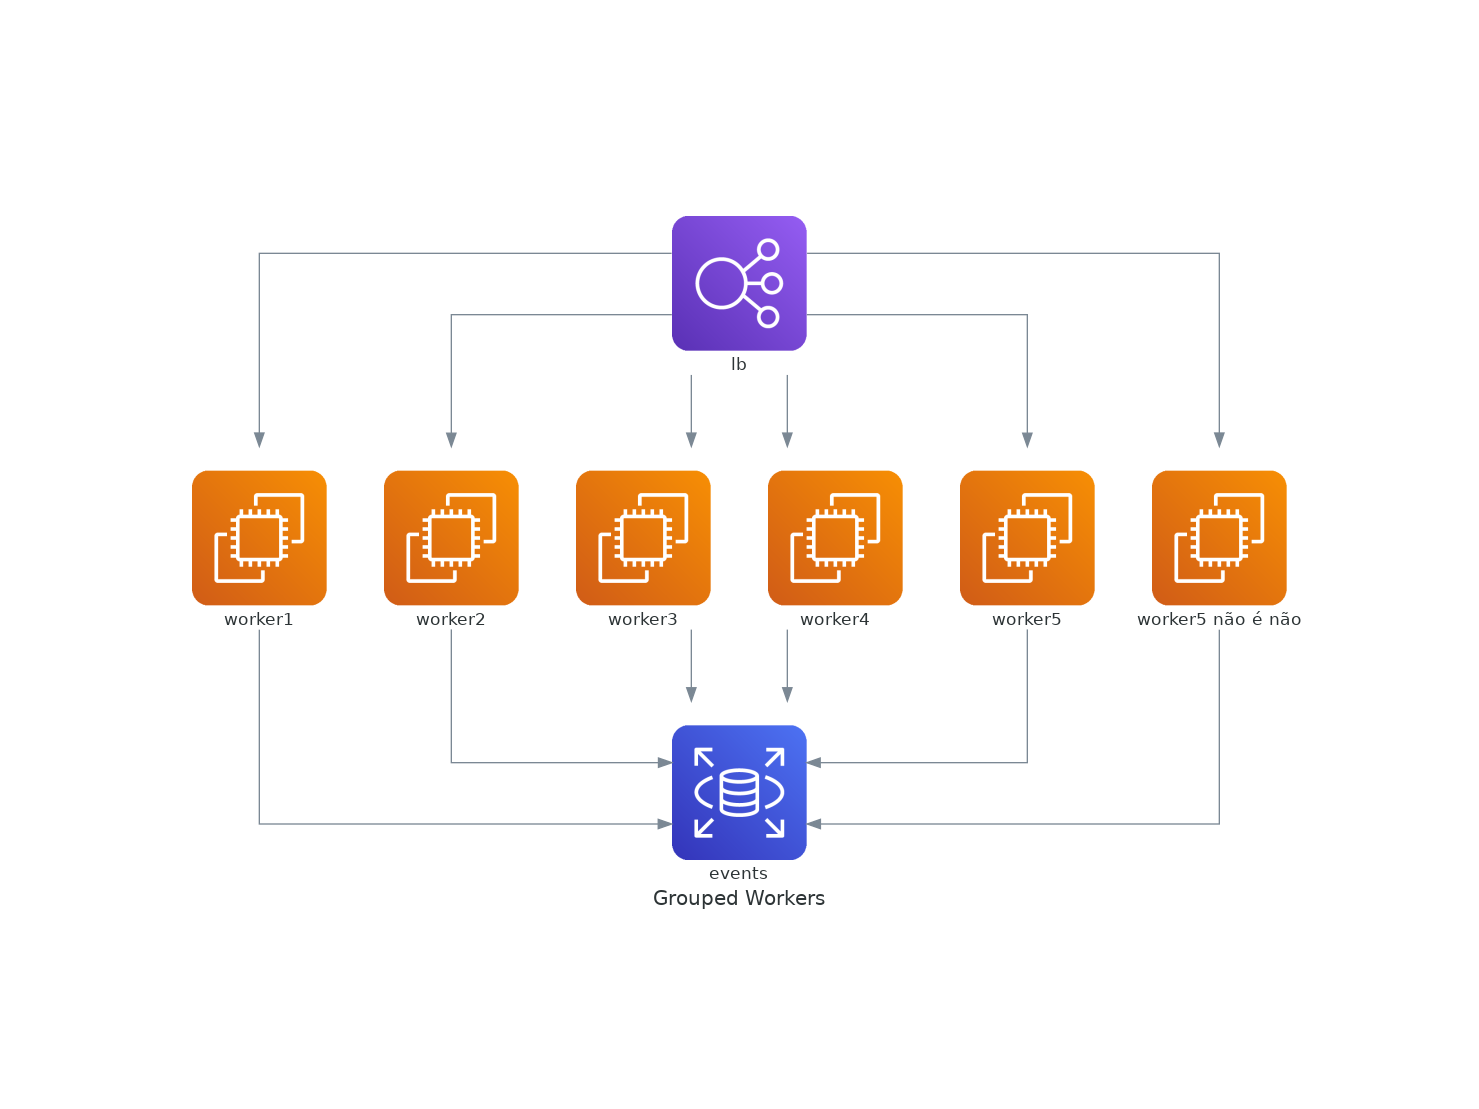

In [40]:
from diagrams.aws.compute import EC2
from diagrams.aws.database import RDS
from diagrams.aws.network import ELB

file="img_aws"
with Diagram("Grouped Workers", filename=file, show=False, direction="TB"):
    ELB("lb") >> [EC2("worker1"),
                  EC2("worker2"),
                  EC2("worker3"),
                  EC2("worker4"),
                  EC2("worker5")] >> RDS("events")

sh()

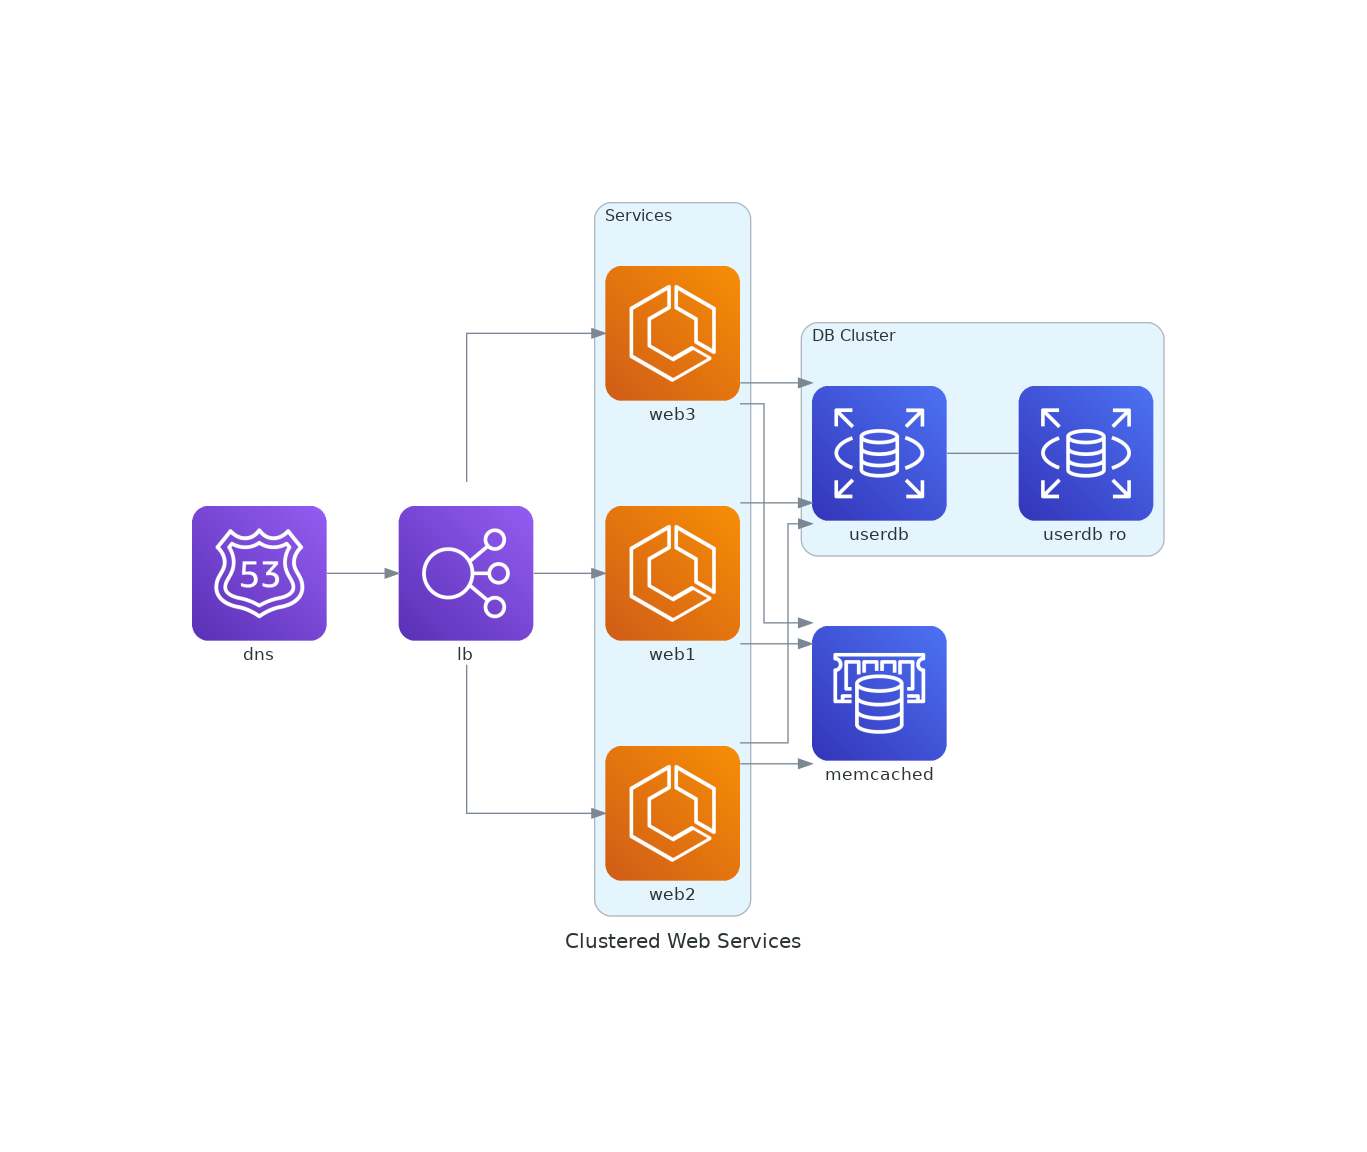

In [15]:
from diagrams.aws.compute import ECS
from diagrams.aws.database import ElastiCache, RDS
from diagrams.aws.network import ELB
from diagrams.aws.network import Route53

file="img_web"
with Diagram("Clustered Web Services", filename=file, show=False):
    dns = Route53("dns")
    lb = ELB("lb")

    with Cluster("Services"):
        svc_group = [ECS("web1"),
                     ECS("web2"),
                     ECS("web3")]

    with Cluster("DB Cluster"):
        db_primary = RDS("userdb")
        db_primary - [RDS("userdb ro")]

    memcached = ElastiCache("memcached")

    dns >> lb >> svc_group
    svc_group >> db_primary
    svc_group >> memcached

sh()

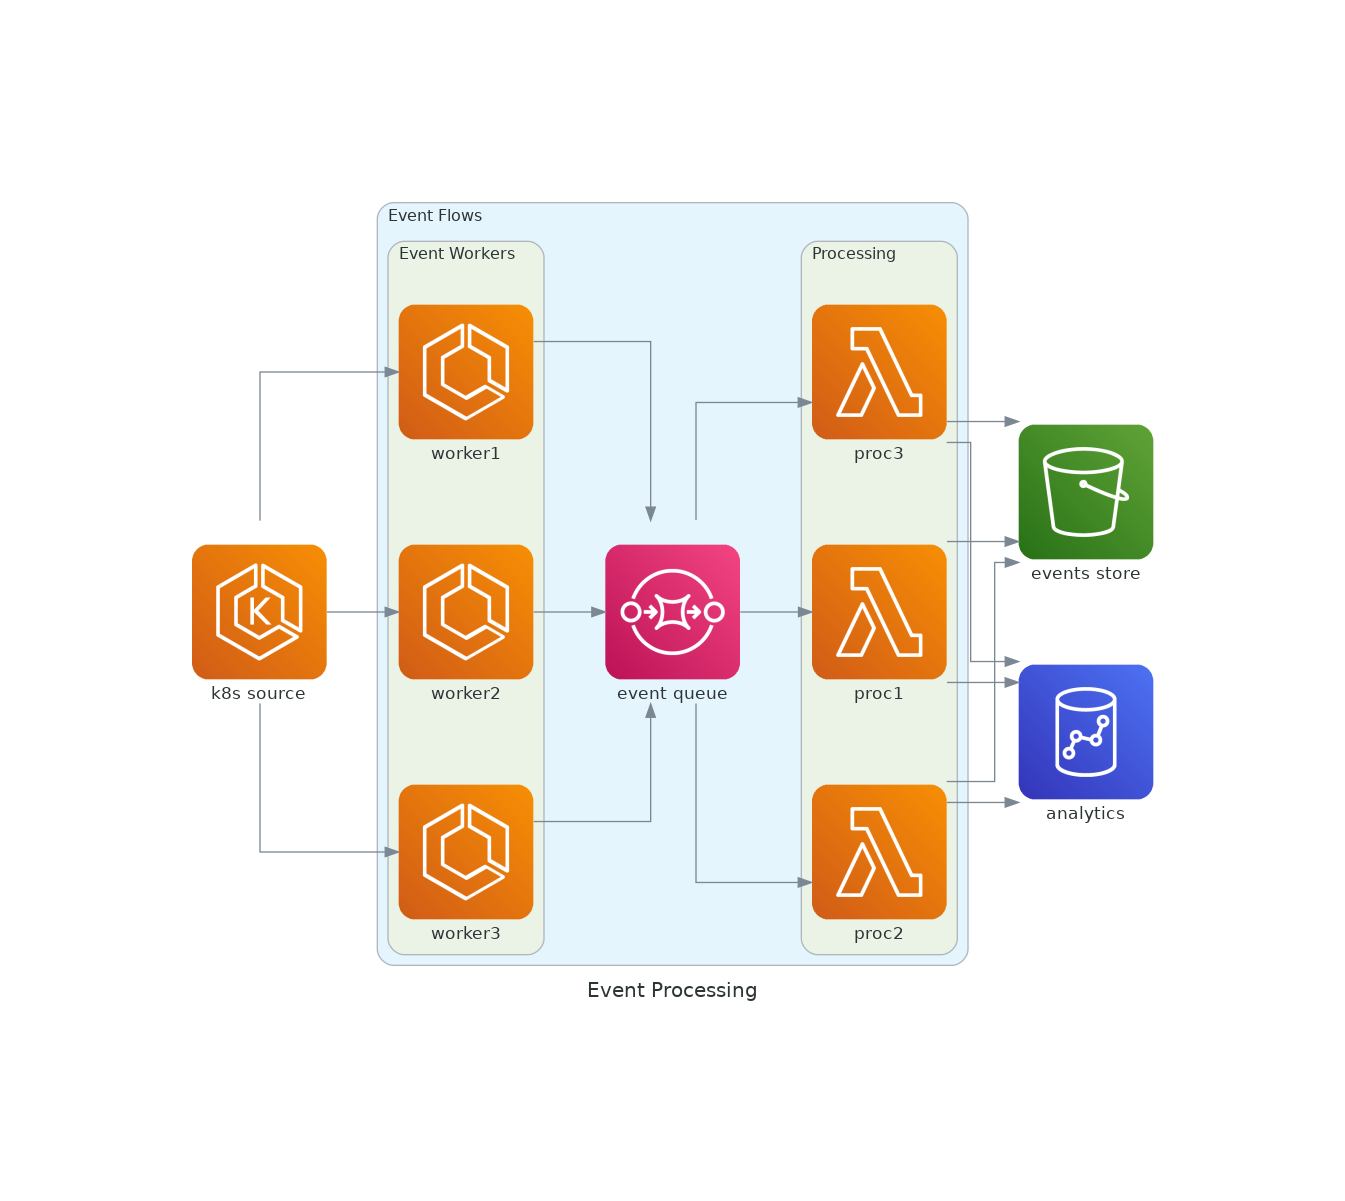

In [19]:
from diagrams.aws.compute import ECS, EKS, Lambda
from diagrams.aws.database import Redshift
from diagrams.aws.integration import SQS
from diagrams.aws.storage import S3

file='img_asw2'
with Diagram("Event Processing",filename=file, show=False):
    source = EKS("k8s source")

    with Cluster("Event Flows"):
        with Cluster("Event Workers"):
            workers = [ECS("worker1"),
                       ECS("worker2"),
                       ECS("worker3")]

        queue = SQS("event queue")

        with Cluster("Processing"):
            handlers = [Lambda("proc1"),
                        Lambda("proc2"),
                        Lambda("proc3")]

    store = S3("events store")
    dw = Redshift("analytics")

    source >> workers >> queue >> handlers
    handlers >> store
    handlers >> dw

sh()

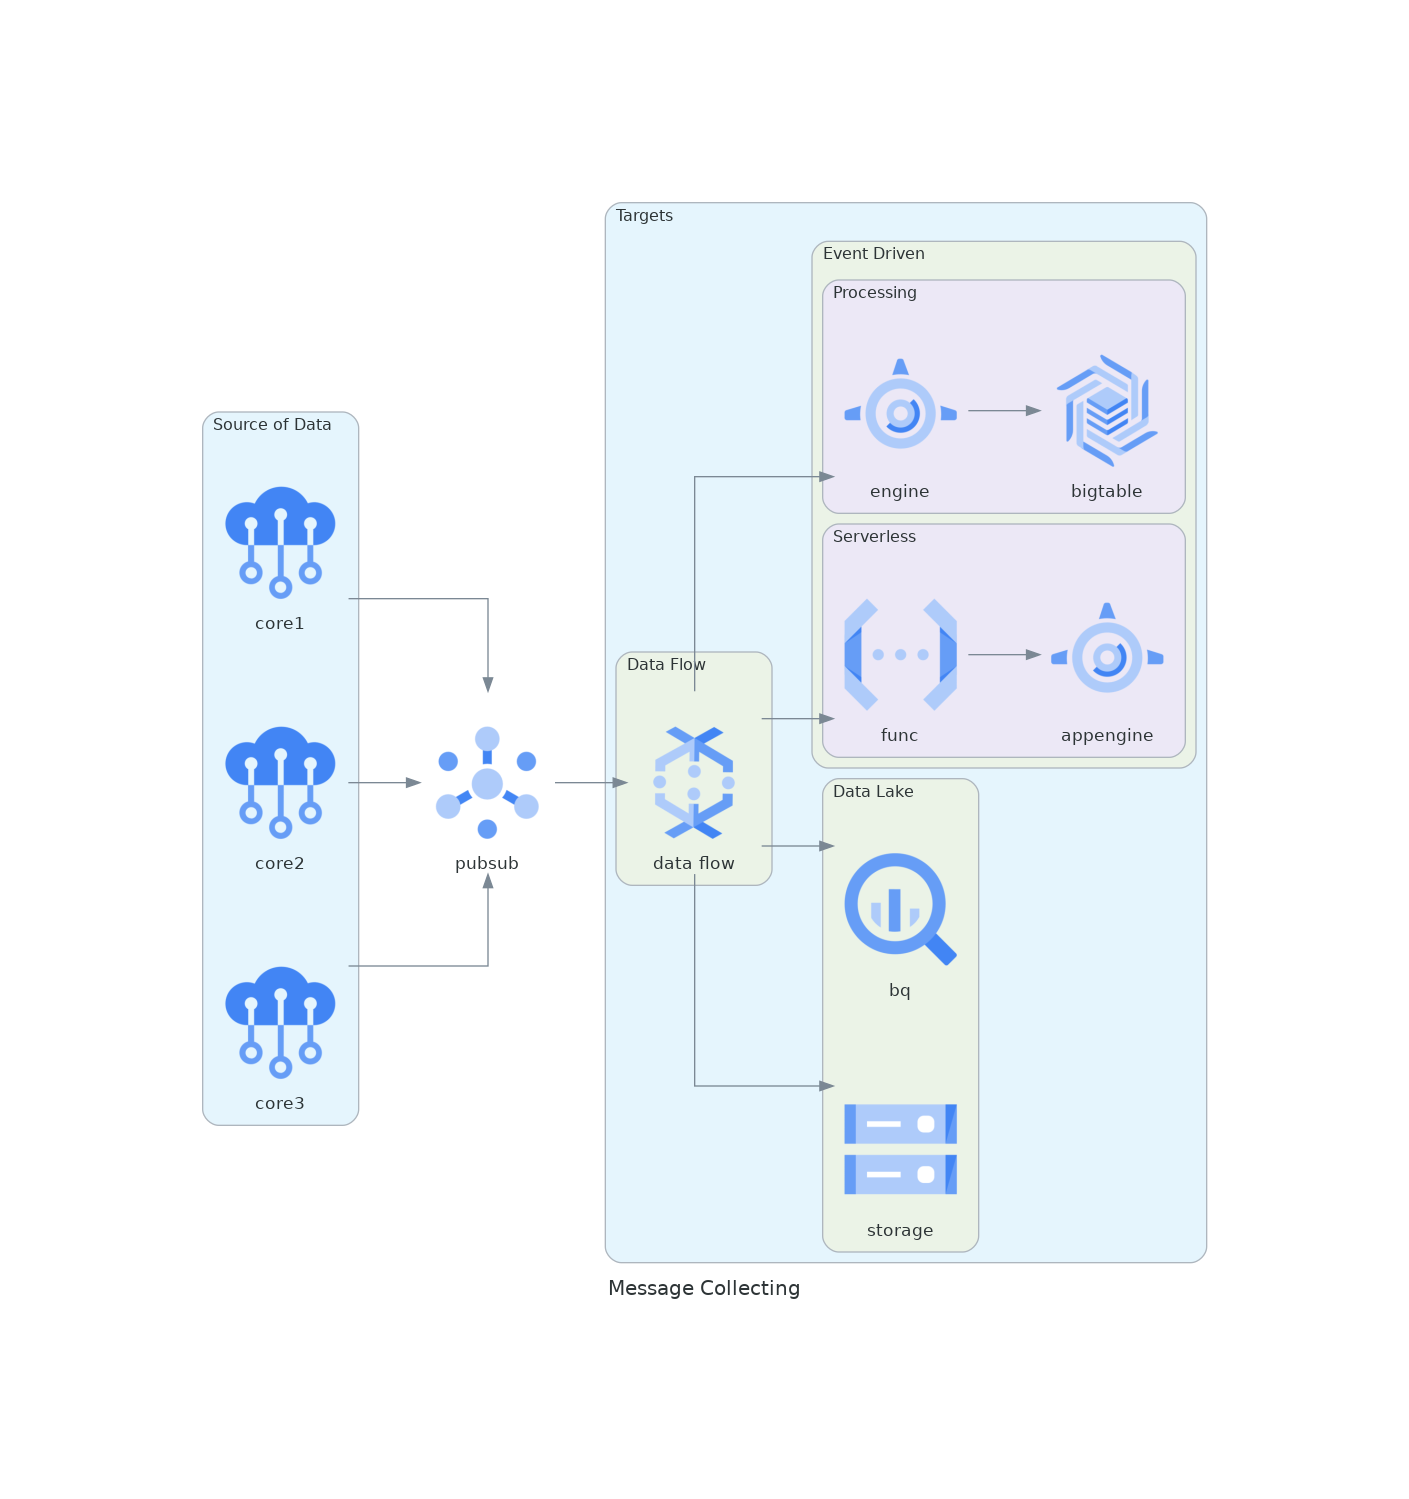

In [21]:
from diagrams.gcp.analytics import BigQuery, Dataflow, PubSub
from diagrams.gcp.compute import AppEngine, Functions
from diagrams.gcp.database import BigTable
from diagrams.gcp.iot import IotCore
from diagrams.gcp.storage import GCS

file='img_gcp'
with Diagram("Message Collecting",filename=file, show=False):
    pubsub = PubSub("pubsub")

    with Cluster("Source of Data"):
        [IotCore("core1"),
         IotCore("core2"),
         IotCore("core3")] >> pubsub

    with Cluster("Targets"):
        with Cluster("Data Flow"):
            flow = Dataflow("data flow")

        with Cluster("Data Lake"):
            flow >> [BigQuery("bq"),
                     GCS("storage")]

        with Cluster("Event Driven"):
            with Cluster("Processing"):
                flow >> AppEngine("engine") >> BigTable("bigtable")

            with Cluster("Serverless"):
                flow >> Functions("func") >> AppEngine("appengine")

    pubsub >> flow

sh()

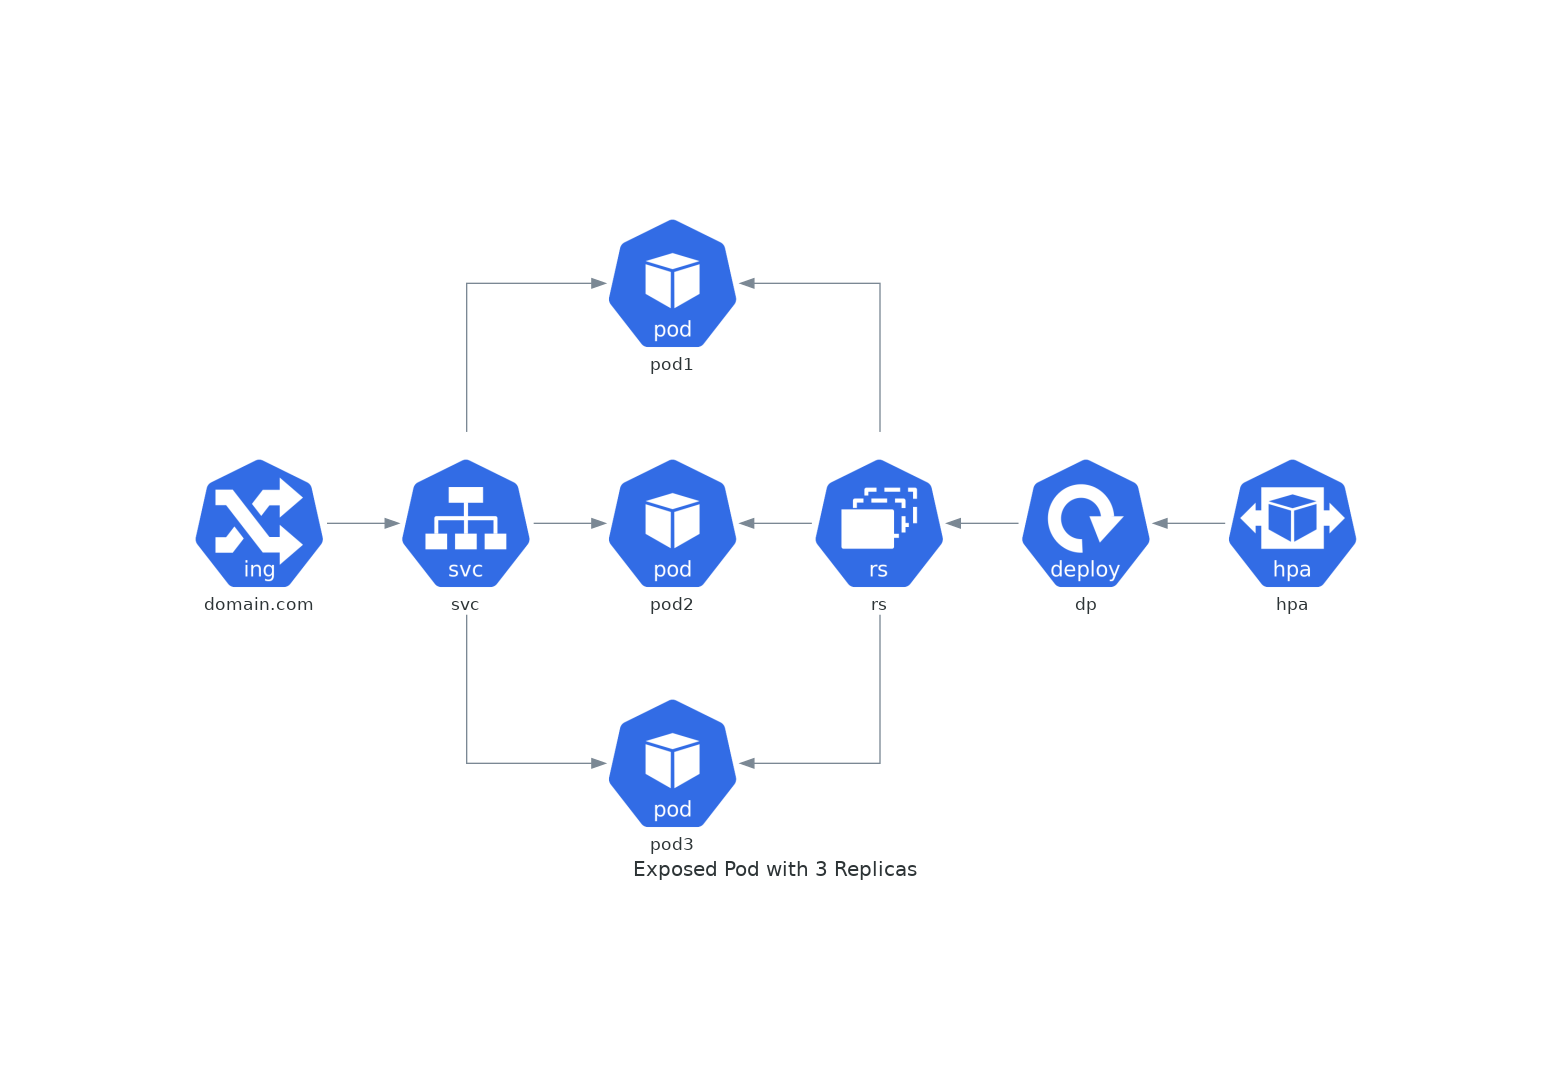

In [23]:
from diagrams.k8s.clusterconfig import HPA
from diagrams.k8s.compute import Deployment, Pod, ReplicaSet
from diagrams.k8s.network import Ingress, Service

file='img_k8s'
with Diagram("Exposed Pod with 3 Replicas",filename=file, show=False):
    net = Ingress("domain.com") >> Service("svc")
    net >> [Pod("pod1"),
            Pod("pod2"),
            Pod("pod3")] << ReplicaSet("rs") << Deployment("dp") << HPA("hpa")
    
sh()

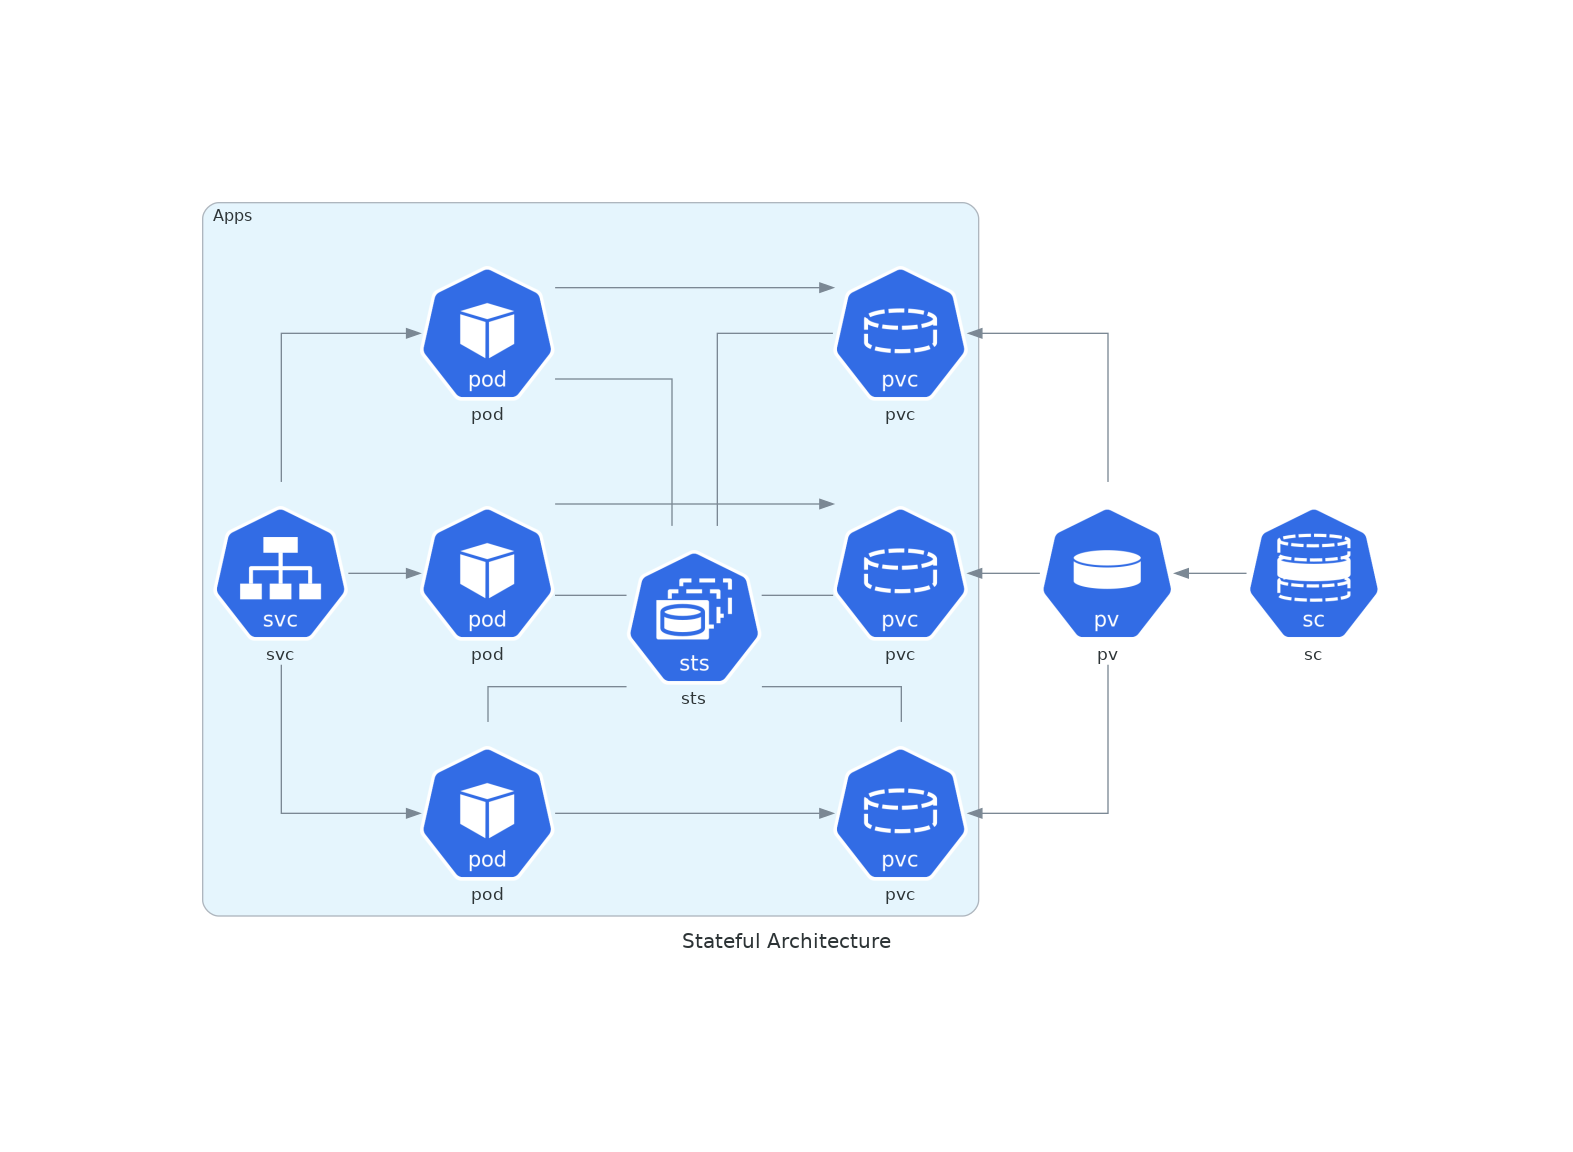

In [26]:
from diagrams.k8s.compute import Pod, StatefulSet
from diagrams.k8s.network import Service
from diagrams.k8s.storage import PV, PVC, StorageClass

file='img_k8s2'
with Diagram("Stateful Architecture",filename=file, show=False):
    with Cluster("Apps"):
        svc = Service("svc")
        sts = StatefulSet("sts")

        apps = []
        for _ in range(3):
            pod = Pod("pod")
            pvc = PVC("pvc")
            pod - sts - pvc
            apps.append(svc >> pod >> pvc)

    apps << PV("pv") << StorageClass("sc")
    
sh()

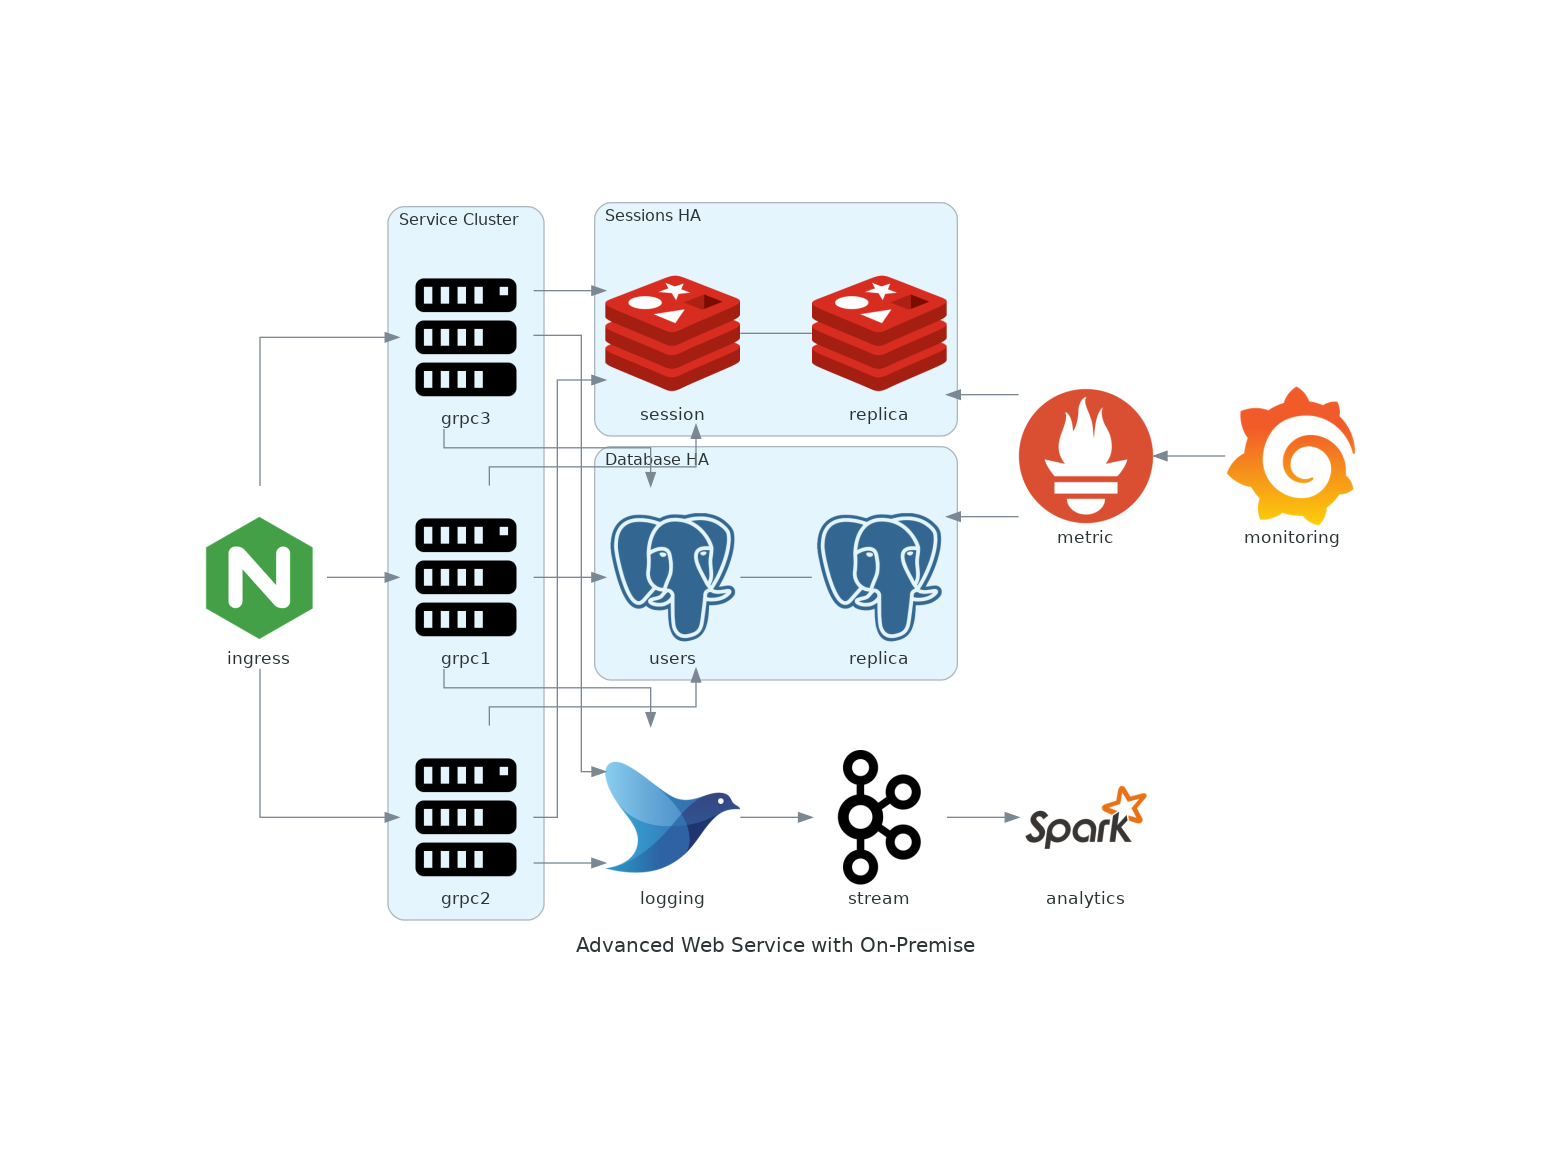

In [28]:
from diagrams.onprem.analytics import Spark
from diagrams.onprem.compute import Server
from diagrams.onprem.database import PostgreSQL
from diagrams.onprem.inmemory import Redis
from diagrams.onprem.aggregator import Fluentd
from diagrams.onprem.monitoring import Grafana, Prometheus
from diagrams.onprem.network import Nginx
from diagrams.onprem.queue import Kafka

file='img_onprem'
with Diagram("Advanced Web Service with On-Premise",filename=file, show=False):
    ingress = Nginx("ingress")

    metrics = Prometheus("metric")
    metrics << Grafana("monitoring")

    with Cluster("Service Cluster"):
        grpcsvc = [
            Server("grpc1"),
            Server("grpc2"),
            Server("grpc3")]

    with Cluster("Sessions HA"):
        primary = Redis("session")
        primary - Redis("replica") << metrics
        grpcsvc >> primary

    with Cluster("Database HA"):
        primary = PostgreSQL("users")
        primary - PostgreSQL("replica") << metrics
        grpcsvc >> primary

    aggregator = Fluentd("logging")
    aggregator >> Kafka("stream") >> Spark("analytics")

    ingress >> grpcsvc >> aggregator
    
sh()

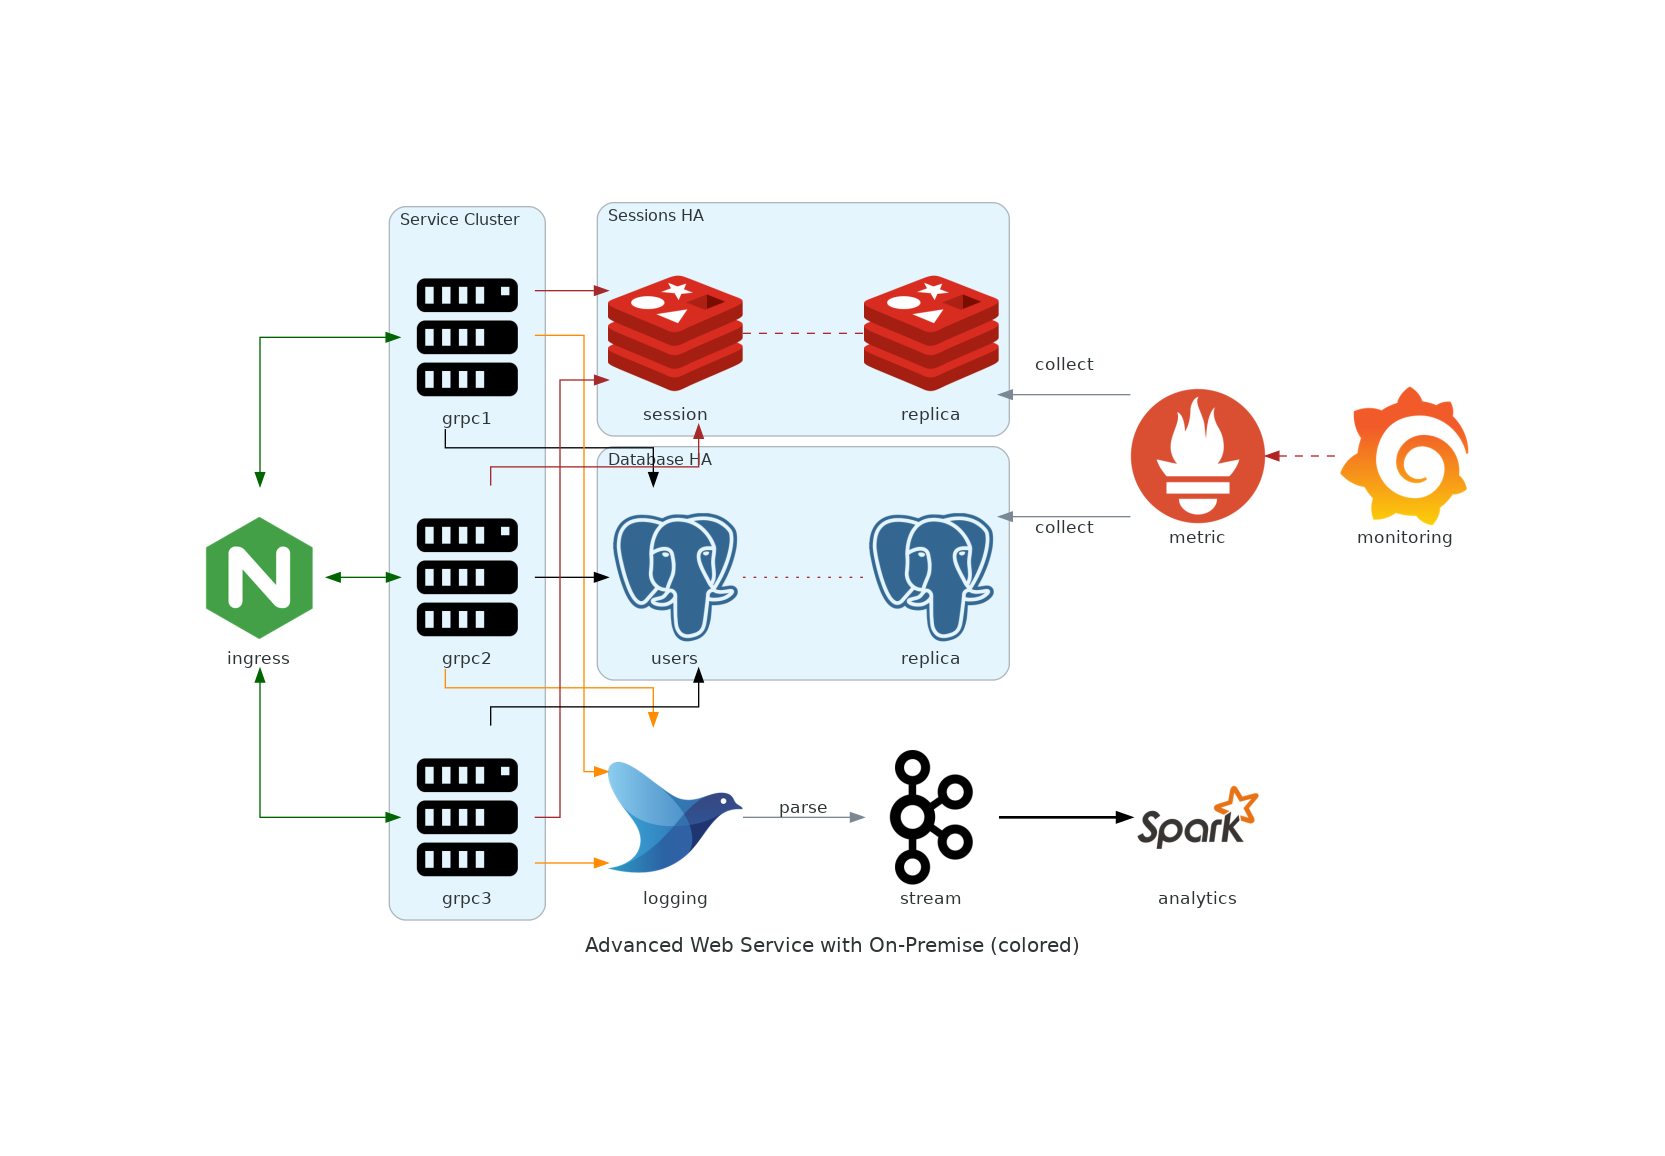

In [36]:
from diagrams.onprem.analytics import Spark
from diagrams.onprem.compute import Server
from diagrams.onprem.database import PostgreSQL
from diagrams.onprem.inmemory import Redis
from diagrams.onprem.aggregator import Fluentd
from diagrams.onprem.monitoring import Grafana, Prometheus
from diagrams.onprem.network import Nginx
from diagrams.onprem.queue import Kafka

file='img_onprem2'
with Diagram(name="Advanced Web Service with On-Premise (colored)",filename=file, show=False):
    ingress = Nginx("ingress")

    metrics = Prometheus("metric")
    metrics << Edge(color="firebrick", style="dashed") << Grafana("monitoring")

    with Cluster("Service Cluster"):
        grpcsvc = [
            Server("grpc1"),
            Server("grpc2"),
            Server("grpc3")]

    with Cluster("Sessions HA"):
        primary = Redis("session")
        primary - Edge(color="brown", style="dashed") - Redis("replica") << Edge(label="collect") << metrics
        grpcsvc >> Edge(color="brown") >> primary

    with Cluster("Database HA"):
        primary = PostgreSQL("users")
        primary - Edge(color="brown", style="dotted") - PostgreSQL("replica") << Edge(label="collect") << metrics
        grpcsvc >> Edge(color="black") >> primary

    aggregator = Fluentd("logging")
    aggregator >> Edge(label="parse") >> Kafka("stream") >> Edge(color="black", style="bold") >> Spark("analytics")

    ingress >> Edge(color="darkgreen") << grpcsvc >> Edge(color="darkorange") >> aggregator
    
sh()

In [37]:
from urllib.request import urlretrieve
from diagrams.aws.database import Aurora
from diagrams.custom import Custom
from diagrams.k8s.compute import Pod

# Download an image to be used into a Custom Node class
rabbitmq_url = "https://jpadilla.github.io/rabbitmqapp/assets/img/icon.png"
rabbitmq_icon = "rabbitmq.png"
urlretrieve(rabbitmq_url, rabbitmq_icon)

file='img_broker'
with Diagram("Broker Consumers",filename=file, show=False):
    with Cluster("Consumers"):
        consumers = [
            Pod("worker"),
            Pod("worker"),
            Pod("worker")]

    queue = Custom("Message queue", rabbitmq_icon)

    queue >> consumers >> Aurora("Database")
    
sh()

KeyboardInterrupt: 

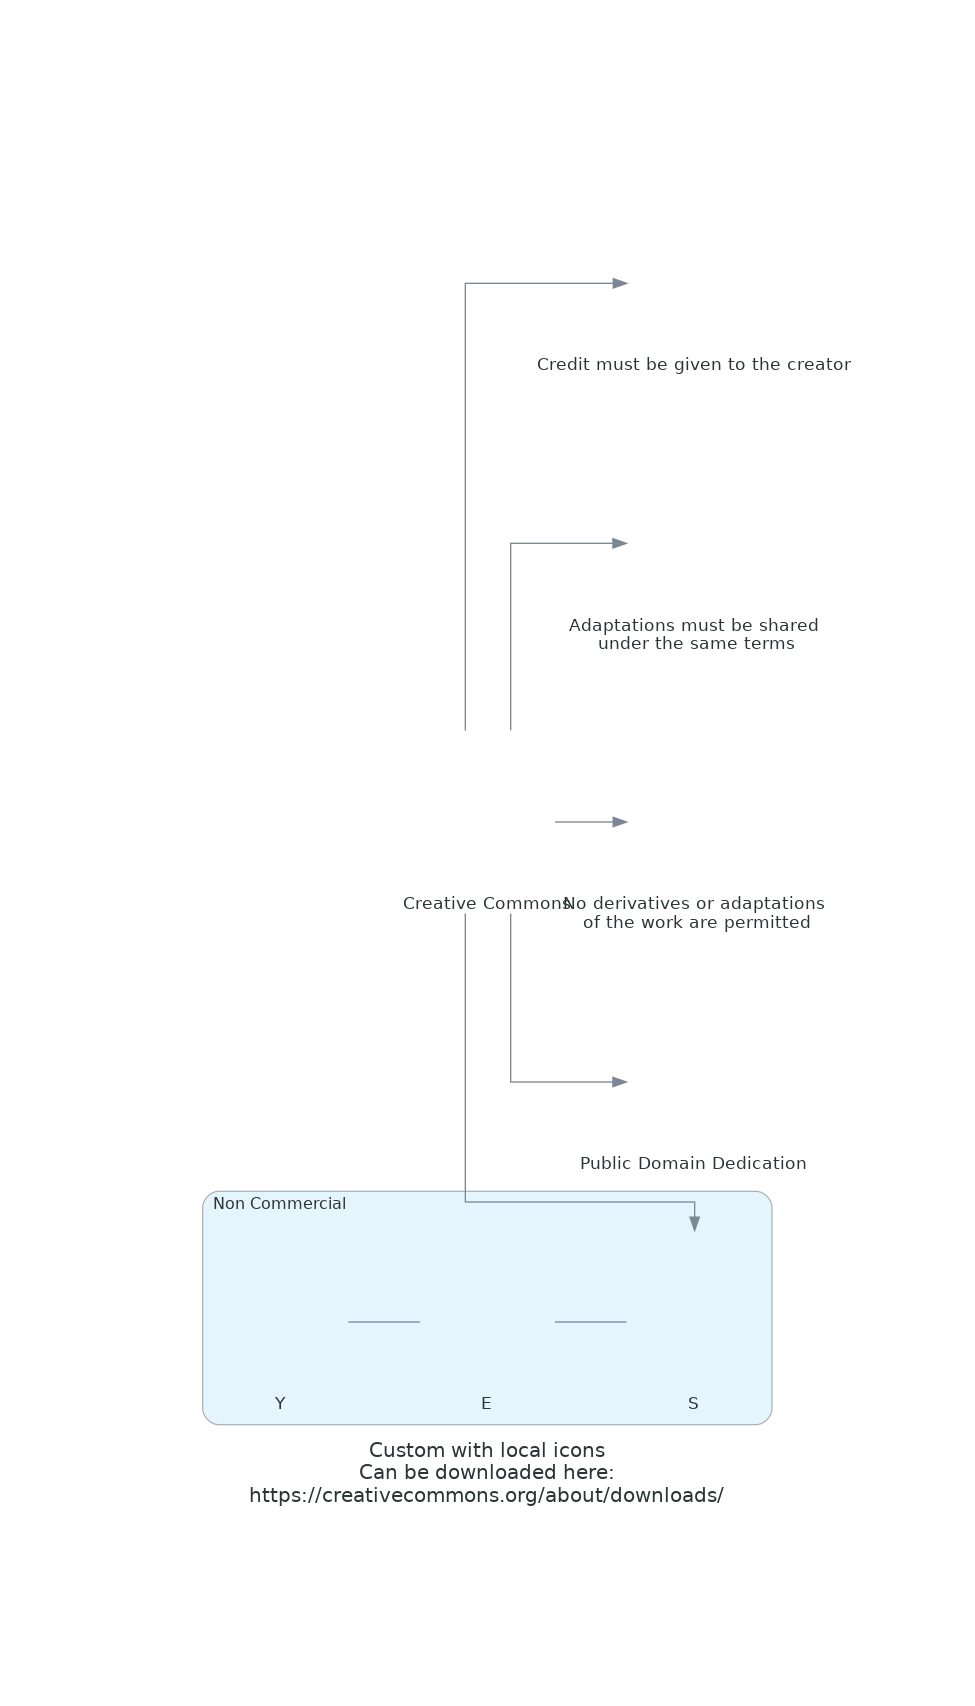

In [38]:
from diagrams.custom import Custom

file='img_custom'
with Diagram("Custom with local icons\n Can be downloaded here: \nhttps://creativecommons.org/about/downloads/", show=False, filename=file, direction="LR"):
  cc_heart = Custom("Creative Commons", "./my_resources/cc_heart.black.png")
  cc_attribution = Custom("Credit must be given to the creator", "./my_resources/cc_attribution.png")

  cc_sa = Custom("Adaptations must be shared\n under the same terms", "./my_resources/cc_sa.png")
  cc_nd = Custom("No derivatives or adaptations\n of the work are permitted", "./my_resources/cc_nd.png")
  cc_zero = Custom("Public Domain Dedication", "./my_resources/cc_zero.png")

  with Cluster("Non Commercial"):
    non_commercial = [Custom("Y", "./my_resources/cc_nc-jp.png") - Custom("E", "./my_resources/cc_nc-eu.png") - Custom("S", "./my_resources/cc_nc.png")]

  cc_heart >> cc_attribution
  cc_heart >> non_commercial
  cc_heart >> cc_sa
  cc_heart >> cc_nd
  cc_heart >> cc_zero
  
sh()

In [39]:
from diagrams.custom import Custom
from urllib.request import urlretrieve

file='img_remote'
with Diagram("Custom with remote icons", show=False, filename=file, direction="LR"):

  # download the icon image file
  diagrams_url = "https://github.com/mingrammer/diagrams/raw/master/assets/img/diagrams.png"
  diagrams_icon = "diagrams.png"
  urlretrieve(diagrams_url, diagrams_icon)

  diagrams = Custom("Diagrams", diagrams_icon)

  with Cluster("Some Providers"):

    openstack_url = "https://github.com/mingrammer/diagrams/raw/master/resources/openstack/openstack.png"
    openstack_icon = "openstack.png"
    urlretrieve(openstack_url, openstack_icon)

    openstack = Custom("OpenStack", openstack_icon)

    elastic_url = "https://github.com/mingrammer/diagrams/raw/master/resources/elastic/saas/elastic.png"
    elastic_icon = "elastic.png"
    urlretrieve(elastic_url, elastic_icon)

    elastic = Custom("Elastic", elastic_icon)

  diagrams >> openstack
  diagrams >> elastic
  
  
sh()

KeyboardInterrupt: 